#CLUSTERING - LESSON 2

#KMeans
K-Means clustering is a simple yet very effective unsupervised machine learning algorithm for data clustering. It belongs to the category of representative-based clustering algorithm. It clusters data based on the Euclidean distance between data points.

In [ ]:
from sklearn.cluster import KMeans
!pip install pyreadr
import pyreadr
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pyreadr.read_r('/content/syntdata0.RDS')
df = data[None]
df

,0,1
0,10.268548,5.160963
1,10.171765,4.608081
2,10.218156,5.787864
3,10.231643,5.321450
4,10.220213,5.044880
...,...,...
145,11.004996,5.522664
146,10.901687,5.833739
147,10.797328,6.862563
148,10.870361,6.097340


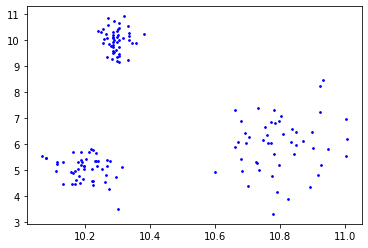

In [ ]:
plt.scatter(df[0], df[1], s=3, c='blue')

In [ ]:
kmeans=KMeans(n_clusters=3).fit(df)

In [ ]:
#get clusters centroids
centroids=kmeans.cluster_centers_
print(kmeans.cluster_centers_)

[[10.30799988  9.9581703 ]
 [10.35449902  5.00136078]
 [10.80353922  6.53327734]]


In [ ]:
#other way to get clusters centroids
centers=kmeans.cluster_centers_
print('the centers are:')
for x,y in centers:
  print('c_%d = (%f, %f)' %(np.argwhere(centers==x)[0][0], x, y))

the centers are:
c_0 = (10.308000, 9.958170)
c_1 = (10.354499, 5.001361)
c_2 = (10.803539, 6.533277)


In [ ]:
#plot the clustering results and the cluster centers
pred = kmeans.predict(df)

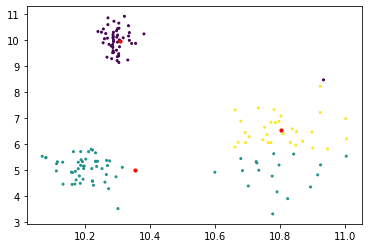

In [ ]:

plt.scatter(df[0], df[1], c=pred, s=4)
plt.scatter(centers[:,0], centers[:,1], s=10, c='red')
plt.show()

In [ ]:
#plot some info
print('The data labels are: ', kmeans.labels_)
#prima misura che ci permette di capire se i clusters sono ben formati
#permette di dire quanto sono omogenei o non i clusters, misura di validazione interna!
print('An estimation of the loss based on the sum of squared distances of samples to their closest cluster center is: ', kmeans.inertia_)
print('The number of iterations needed to obtain the result is: ', kmeans.n_iter_)
print('The number of features found is: ', kmeans.n_features_in_)

The data labels are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 1 1 2 1 1 2
 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 2 2 2 0 1 1 2 1 2 1 2 2 1 2 2
 2 1]
An estimation of the loss based on the sum of squared distances of samples to their closest cluster center is:  44.99846880233322
The number of iterations needed to obtain the result is:  9
The number of features found is:  2


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 1 1 2 1 1 2
 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 2 2 2 0 1 1 2 1 2 1 2 2 1 2 2
 2 1]


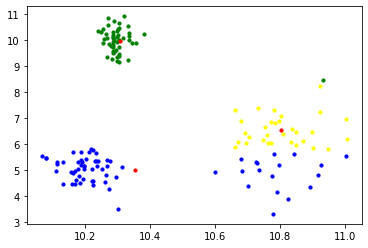

In [ ]:

#filter rows of original data
labels= kmeans.labels_
print(labels)
filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
filtered_label2 = df[labels == 2]
#plotting the results
plt.scatter(filtered_label0[0] , filtered_label0[1], s=10, color='green')
plt.scatter(filtered_label1[0] , filtered_label1[1], s=10, color='blue')
plt.scatter(filtered_label2[0] , filtered_label2[1], s=10, color='yellow')
plt.scatter(centers[:,0], centers[:,1], s=10, c='red')
plt.show()

the clustering result is WRONG! why? we are looking at something scaled which is not scaled, the scale on the x and y axis is different. We can now plot the data so that the scales on the two axes are equal

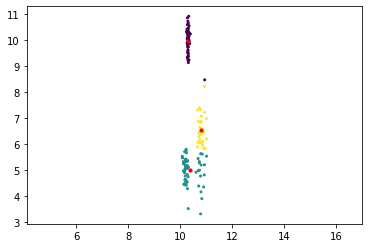

In [ ]:
plt.scatter(df[0], df[1], c = pred, s=4)
plt.scatter(centers[:,0], centers[:,1], s=10, c='red')
plt.axis('equal')
plt.show()

To avoid this problem we can normalize data during preprocessing as shown below

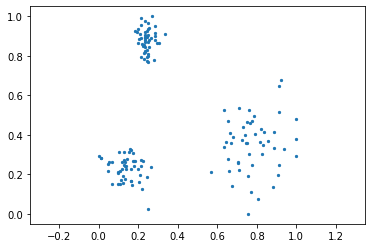

In [ ]:
from sklearn import preprocessing
import pandas as pd

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
plt.scatter(df_scaled[0].values, df_scaled[1].values, s=5)
plt.axis('equal')
plt.show()

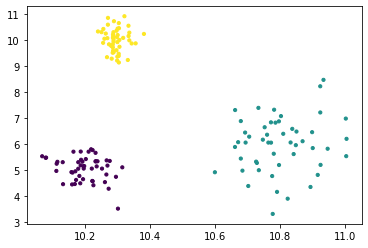

In [ ]:
kmeans_scaled = KMeans(n_clusters=3).fit(df_scaled)
#plot the clustering results and the cluster centers
new_pred = kmeans_scaled.predict(df_scaled)
plt.scatter(df[0], df[1], c = new_pred, s=10)
plt.show()

# Agglomerative Clustering
Bottom-up (agglomerative): The data points are successively agglomerated into higher-level clusters. The main variation among the different implementations is in how select the clusters to merge.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc



The following linkage methods are used to compute the distance  between two clusters s and t. The algorithm begins with a forest of clusters that have yet to be used in the hierarchy being formed. When two clusters s and t from this forest are combined into a single cluster u , s and t are removed from the forest, and u  is added to the forest. When only one cluster remains in the forest, the algorithm stops, and this cluster becomes the root.

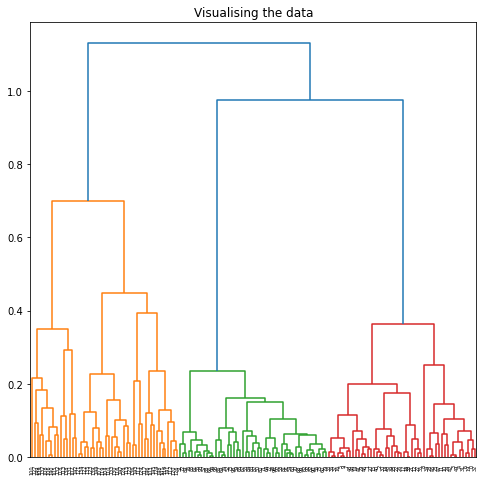

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_scaled, method ='complete')))
#the method 'complete' uses the Farthest Point Algorithm or Voor Hees Algorithm.

#algoritmo che funziona in modo agglomerativo, siamo partiti dal basso e abbiamo agglomerato per arrivare in alto
# per agglomerare abbiamo definito gli unici due parametri che servono:
#1) la distanza per confrontare due dati è la distanza euclidea
#2) la distanza per confrontare due clusters è la distanza completa, la massima distanza tra due elementi del cluster

#ci restituisce il dendogramma, dobbiamo decidere a che livello tagliare il dendogramma
#posto stabilire a posteriori il numero di cluster che voglio ottnere andano a tagliate il dendogramma ad una certa altezza oppure dicendo il numero di cluster che voglio

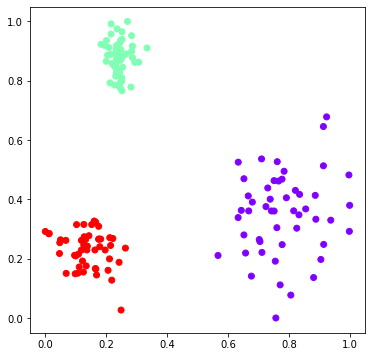

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_scaled[0], df_scaled[1], c = ac3.fit_predict(df_scaled), cmap ='rainbow')
plt.show()

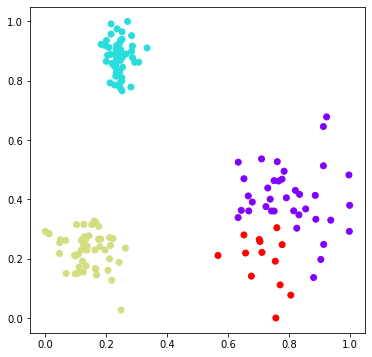

In [ ]:

ac4 = AgglomerativeClustering(n_clusters = 4)
 
plt.figure(figsize =(6, 6))
plt.scatter(df_scaled[0], df_scaled[1], c = ac4.fit_predict(df_scaled), cmap ='rainbow')
plt.show()

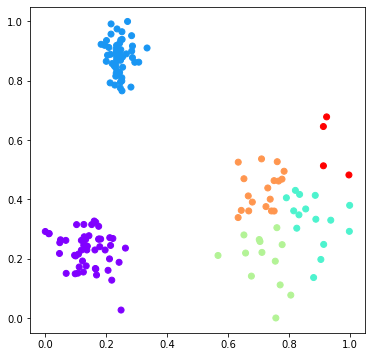

In [ ]:
ac6 = AgglomerativeClustering(n_clusters = 6)
 
plt.figure(figsize =(6, 6))
plt.scatter(df_scaled[0], df_scaled[1], c = ac6.fit_predict(df_scaled), cmap ='rainbow')
plt.show()

#Silhouette Coefficient or silhouette score
is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

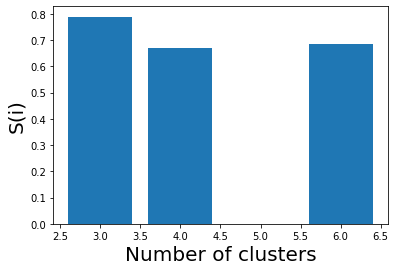

In [ ]:
k = [3, 4, 6]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df_scaled, ac3.fit_predict(df_scaled)))
silhouette_scores.append(
        silhouette_score(df_scaled, ac4.fit_predict(df_scaled)))
silhouette_scores.append(
        silhouette_score(df_scaled, ac6.fit_predict(df_scaled)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

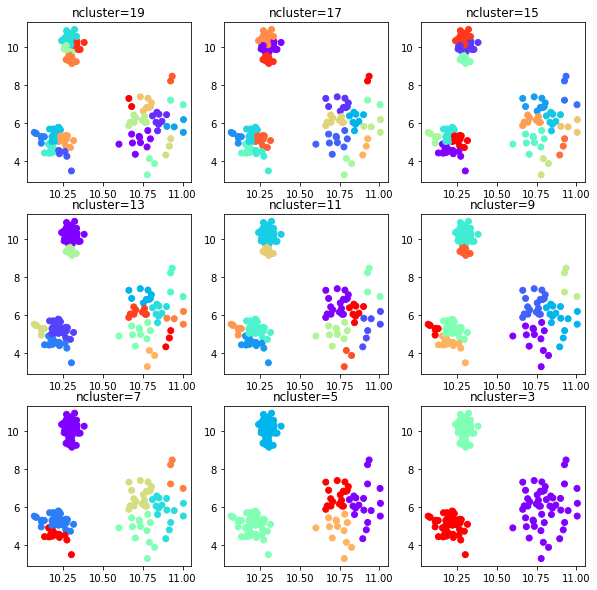

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i in range(3):
       for j in range(3):
              k = 19 - (i*3+j)*2
              ac = AgglomerativeClustering(n_clusters = k)
              axs[i, j].scatter(df[0], df[1], 
                            c = ac.fit_predict(df_scaled), cmap ='rainbow')
              axs[i, j].set_title('ncluster='+ str(k))